In [16]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds_train = xr.open_dataset('datasets/train.nc')
ds_val = xr.open_dataset('datasets/val.nc')
ds_test = xr.open_dataset('datasets/test.nc')

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [3]:
def dataset_to_dataloader(_ds, batch_size=1024, shuffle=False):
  X = torch.tensor(_ds['X'].values.astype('float32'))
  Y = torch.tensor(_ds['Xcouple'].values.astype('float32'))
  #https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader
  return DataLoader(TensorDataset(X,Y), batch_size=batch_size, shuffle=shuffle)

In [4]:
train_loader=dataset_to_dataloader(ds_train, shuffle=True)
val_loader=dataset_to_dataloader(ds_train)

In [23]:
sgs = ANN()

In [24]:
%%time
sgs.do_training(train_loader, val_loader, max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 13:  41%|████      | 40/98 [00:05<00:07,  7.96it/s, loss=2.32, v_num=2.6e+7, train_loss=2.360, train_MSE=2.360, train_reg=-, val_loss=2.330, val_MSE=2.330, val_reg=0.000] 

Epoch 0:  41%|████      | 40/98 [00:00<00:00, 82.29it/s, loss=9.5, v_num=2.6e+7, train_loss=7.000, train_MSE=7.000, train_reg=-] 
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 65.29it/s, loss=3.58, v_num=2.6e+7, train_loss=3.400, train_MSE=3.400, train_reg=-, val_loss=5.440, val_MSE=5.440, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 108.44it/s, loss=3.06, v_num=2.6e+7, train_loss=2.990, train_MSE=2.990, train_reg=-, val_loss=3.270, val_MSE=3.270, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 123.73it/s, loss=2.87, v_num=2.6e+7, train_loss=2.920, train_MSE=2.920, train_reg=-, val_loss=2.960, val_MSE=2.960, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:

Epoch 10:  41%|████      | 40/98 [00:00<00:00, 123.54it/s, loss=2.45, v_num=2.6e+7, train_loss=2.490, train_MSE=2.490, train_reg=-, val_loss=2.450, val_MSE=2.450, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 122.85it/s, loss=2.42, v_num=2.6e+7, train_loss=2.470, train_MSE=2.470, train_reg=-, val_loss=2.460, val_MSE=2.460, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 85.51it/s, loss=2.41, v_num=2.6e+7, train_loss=2.420, train_MSE=2.420, train_reg=-, val_loss=2.400, val_MSE=2.400, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98 [00:00<00:00, 123.53it/s, loss=2.4, v_num=2.6e+7, train_loss=2.460, train_MSE=2.460, train_reg=-, val_loss=2.380, val_MSE=2.380, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 14:  41%|████      | 40/98 [00:00<00:00, 123.48it/s, loss=2.39, v_num=2.6e+7, train_loss=2.490, train_MSE=2.490, train_reg=-, val_loss=2.370, val_MSE=2.370, v

Epoch 19:  41%|████      | 40/98 [00:00<00:00, 81.08it/s, loss=2.32, v_num=2.6e+7, train_loss=2.300, train_MSE=2.300, train_reg=-, val_loss=2.320, val_MSE=2.320, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 123.23it/s, loss=2.3, v_num=2.6e+7, train_loss=2.300, train_MSE=2.300, train_reg=-, val_loss=2.280, val_MSE=2.280, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/98 [00:00<00:00, 90.50it/s, loss=2.29, v_num=2.6e+7, train_loss=2.260, train_MSE=2.260, train_reg=-, val_loss=2.280, val_MSE=2.280, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 22:  41%|████      | 40/98 [00:00<00:00, 92.32it/s, loss=2.31, v_num=2.6e+7, train_loss=2.290, train_MSE=2.290, train_reg=-, val_loss=2.270, val_MSE=2.270, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 23:  41%|████      | 40/98 [00:00<00:00, 76.13it/s, loss=2.27, v_num=2.6e+7, train_loss=2.260, train_MSE=2.260, train_reg=-, val_loss=2.290, val_MSE=2.290, val

Epoch 28:  41%|████      | 40/98 [00:00<00:00, 120.22it/s, loss=2.23, v_num=2.6e+7, train_loss=2.270, train_MSE=2.270, train_reg=-, val_loss=2.240, val_MSE=2.240, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 40/98 [00:00<00:00, 120.65it/s, loss=2.23, v_num=2.6e+7, train_loss=2.160, train_MSE=2.160, train_reg=-, val_loss=2.230, val_MSE=2.230, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 30:  41%|████      | 40/98 [00:00<00:00, 82.42it/s, loss=2.23, v_num=2.6e+7, train_loss=2.200, train_MSE=2.200, train_reg=-, val_loss=2.210, val_MSE=2.210, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 31:  41%|████      | 40/98 [00:00<00:00, 120.31it/s, loss=2.21, v_num=2.6e+7, train_loss=2.200, train_MSE=2.200, train_reg=-, val_loss=2.210, val_MSE=2.210, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 32:  41%|████      | 40/98 [00:00<00:00, 121.02it/s, loss=2.21, v_num=2.6e+7, train_loss=2.140, train_MSE=2.140, train_reg=-, val_loss=2.230, val_MSE=2.230, v

Epoch 37:  41%|████      | 40/98 [00:00<00:00, 114.97it/s, loss=2.19, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_reg=-, val_loss=2.150, val_MSE=2.150, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 38:  41%|████      | 40/98 [00:00<00:00, 78.58it/s, loss=2.2, v_num=2.6e+7, train_loss=2.240, train_MSE=2.240, train_reg=-, val_loss=2.170, val_MSE=2.170, val_reg=0.000]  
Validation: 0it [00:00, ?it/s]
Epoch 39:  41%|████      | 40/98 [00:00<00:00, 119.99it/s, loss=2.19, v_num=2.6e+7, train_loss=2.210, train_MSE=2.210, train_reg=-, val_loss=2.180, val_MSE=2.180, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 40:  41%|████      | 40/98 [00:00<00:00, 120.11it/s, loss=2.16, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_reg=-, val_loss=2.180, val_MSE=2.180, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 41:  41%|████      | 40/98 [00:00<00:00, 102.38it/s, loss=2.17, v_num=2.6e+7, train_loss=2.160, train_MSE=2.160, train_reg=-, val_loss=2.180, val_MSE=2.180, v

Epoch 47:  41%|████      | 40/98 [00:00<00:00, 123.20it/s, loss=2.14, v_num=2.6e+7, train_loss=2.100, train_MSE=2.100, train_reg=-, val_loss=2.150, val_MSE=2.150, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 48:  41%|████      | 40/98 [00:00<00:00, 123.57it/s, loss=2.14, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_reg=-, val_loss=2.140, val_MSE=2.140, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 49:  41%|████      | 40/98 [00:00<00:00, 85.74it/s, loss=2.15, v_num=2.6e+7, train_loss=2.100, train_MSE=2.100, train_reg=-, val_loss=2.150, val_MSE=2.150, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 121.87it/s, loss=2.14, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_reg=-, val_loss=2.140, val_MSE=2.140, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 117.50it/s, loss=2.16, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_reg=-, val_loss=2.130, val_MSE=2.130, v

Epoch 56:  41%|████      | 40/98 [00:00<00:00, 85.19it/s, loss=2.12, v_num=2.6e+7, train_loss=2.060, train_MSE=2.060, train_reg=-, val_loss=2.120, val_MSE=2.120, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 57:  41%|████      | 40/98 [00:00<00:00, 122.98it/s, loss=2.12, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 111.18it/s, loss=2.12, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 104.35it/s, loss=2.12, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_reg=-, val_loss=2.110, val_MSE=2.110, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 75.25it/s, loss=2.11, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-, val_loss=2.120, val_MSE=2.120, va

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 123.09it/s, loss=2.1, v_num=2.6e+7, train_loss=2.100, train_MSE=2.100, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 117.09it/s, loss=2.1, v_num=2.6e+7, train_loss=2.180, train_MSE=2.180, train_reg=-, val_loss=2.070, val_MSE=2.070, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 67.75it/s, loss=2.1, v_num=2.6e+7, train_loss=2.020, train_MSE=2.020, train_reg=-, val_loss=2.090, val_MSE=2.090, val_reg=0.000]  
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 104.34it/s, loss=2.09, v_num=2.6e+7, train_loss=2.070, train_MSE=2.070, train_reg=-, val_loss=2.070, val_MSE=2.070, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████      | 40/98 [00:00<00:00, 112.36it/s, loss=2.11, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_reg=-, val_loss=2.070, val_MSE=2.070, v

Epoch 74:  41%|████      | 40/98 [00:00<00:00, 120.44it/s, loss=2.08, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-, val_loss=2.070, val_MSE=2.070, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 83.27it/s, loss=2.06, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 117.04it/s, loss=2.08, v_num=2.6e+7, train_loss=2.140, train_MSE=2.140, train_reg=-, val_loss=2.060, val_MSE=2.060, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/98 [00:00<00:00, 118.31it/s, loss=2.05, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_reg=-, val_loss=2.060, val_MSE=2.060, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 78:  41%|████      | 40/98 [00:00<00:00, 73.18it/s, loss=2.06, v_num=2.6e+7, train_loss=2.060, train_MSE=2.060, train_reg=-, val_loss=2.050, val_MSE=2.050, va

Epoch 84:  41%|████      | 40/98 [00:00<00:00, 123.30it/s, loss=2.05, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_reg=-, val_loss=2.050, val_MSE=2.050, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/98 [00:00<00:00, 123.30it/s, loss=2.03, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_reg=-, val_loss=2.030, val_MSE=2.030, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 86:  41%|████      | 40/98 [00:00<00:00, 86.60it/s, loss=2.05, v_num=2.6e+7, train_loss=2.100, train_MSE=2.100, train_reg=-, val_loss=2.050, val_MSE=2.050, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 87:  41%|████      | 40/98 [00:00<00:00, 121.15it/s, loss=2.07, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_reg=-, val_loss=2.070, val_MSE=2.070, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 88:  41%|████      | 40/98 [00:00<00:00, 121.08it/s, loss=2.04, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_reg=-, val_loss=2.050, val_MSE=2.050, v

Epoch 93:  41%|████      | 40/98 [00:00<00:00, 63.51it/s, loss=2.06, v_num=2.6e+7, train_loss=2.010, train_MSE=2.010, train_reg=-, val_loss=2.030, val_MSE=2.030, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 94:  41%|████      | 40/98 [00:00<00:00, 96.09it/s, loss=2.05, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_reg=-, val_loss=2.080, val_MSE=2.080, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 95:  41%|████      | 40/98 [00:00<00:00, 115.82it/s, loss=2.05, v_num=2.6e+7, train_loss=1.990, train_MSE=1.990, train_reg=-, val_loss=2.070, val_MSE=2.070, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 96:  41%|████      | 40/98 [00:00<00:00, 112.47it/s, loss=2.05, v_num=2.6e+7, train_loss=2.070, train_MSE=2.070, train_reg=-, val_loss=2.030, val_MSE=2.030, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 97:  41%|████      | 40/98 [00:00<00:00, 70.02it/s, loss=2.06, v_num=2.6e+7, train_loss=2.060, train_MSE=2.060, train_reg=-, val_loss=2.040, val_MSE=2.040, val

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 104.37it/s, loss=2.04, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-, val_loss=2.060, val_MSE=2.060, val_reg=0.000]
CPU times: user 11min 39s, sys: 1.24 s, total: 11min 40s
Wall time: 1min 25s


In [25]:
pred = sgs.predict(ds_test)

In [29]:
X = pred.X.values.ravel()
Xcouple = pred.Xcouple.values.ravel()
Xpred = pred.Xpred.values.ravel()

Text(0.5, 1.0, 'Forcing TRUE vs input')

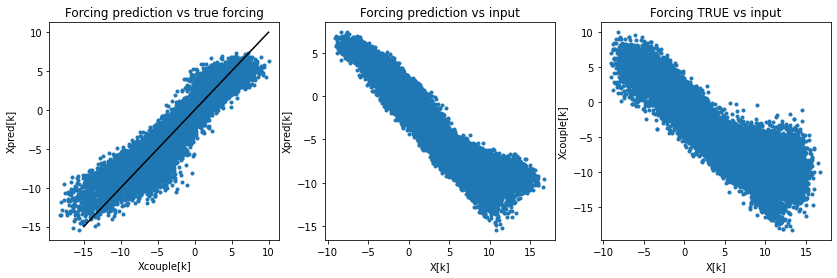

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(Xcouple, Xpred, '.')
plt.xlabel('Xcouple[k]')
plt.ylabel('Xpred[k]')
plt.title('Forcing prediction vs true forcing')
plt.plot([-15, 10], [-15,10],'k')
plt.subplot(1,3,2)
plt.plot(X, Xpred, '.')
plt.xlabel('X[k]')
plt.ylabel('Xpred[k]')
plt.title('Forcing prediction vs input')
plt.subplot(1,3,3)
plt.plot(X, Xcouple, '.')
plt.xlabel('X[k]')
plt.ylabel('Xcouple[k]')
plt.title('Forcing TRUE vs input')